The data shows the information of American colleges and universities in 1995, the detail as below. And we would like to classify good colleges and universities. <br>
[ACollege1995P.csv] Columns:<br>
app - No. of applicants received<br>
acc - No. of applicants accepted<br>
enrol - No. of new students enrolled<br>
ftime - No. of full-time undergraduates<br>
ptime - No. of part-time undergraduate<br>
instate - In-state tuition<br>
outstate - Out-state tuition<br>
rbcost - Room and board cost<br>
bkcost - Estimated book cost<br>
phd - % of faculty with Ph.D.<br>
sfratio - Student/faculty ratio<br>
expend - Instructional expenditure per student<br>
grad - Graduation rate<br>
good - With 30%+ new students from top 10% high school class.

In [1]:
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('../ACollege1995P.csv')

In [2]:
X_train, X_test, y_train, y_test = train_test_split(data.ix[:,:'grad'], data.good, test_size=0.3, random_state=852)

In [3]:
logreg = linear_model.LogisticRegression(C=1e2)
logreg.fit(X_train, y_train)
print(classification_report(y_train, logreg.predict(X_train)))
print('training error:', 1-sum(y_train == logreg.predict(X_train))/len(y_train))
print(classification_report(y_test, logreg.predict(X_test)))
print('testing error:', 1-sum(y_test == logreg.predict(X_test))/len(y_test))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90       422
          1       0.75      0.59      0.66       145

avg / total       0.84      0.84      0.84       567

training error: 0.1569664903
             precision    recall  f1-score   support

          0       0.85      0.95      0.90       178
          1       0.80      0.55      0.65        66

avg / total       0.84      0.84      0.83       244

testing error: 0.159836065574


In [4]:
# Model from R_Example
logreg = linear_model.LogisticRegression(C=1e2)
logreg.fit(X_train.ix[:,[3,4,7,8,9,11,12]], y_train)
print(classification_report(y_train, logreg.predict(X_train.ix[:,[3,4,7,8,9,11,12]])))
print('training error:', 1-sum(y_train == logreg.predict(X_train.ix[:,[3,4,7,8,9,11,12]]))/len(y_train))
print(classification_report(y_test, logreg.predict(X_test.ix[:,[3,4,7,8,9,11,12]])))
print('testing error:', 1-sum(y_test == logreg.predict(X_test.ix[:,[3,4,7,8,9,11,12]]))/len(y_test))

             precision    recall  f1-score   support

          0       0.86      0.95      0.90       422
          1       0.79      0.55      0.65       145

avg / total       0.84      0.85      0.84       567

training error: 0.151675485009
             precision    recall  f1-score   support

          0       0.86      0.97      0.91       178
          1       0.86      0.56      0.68        66

avg / total       0.86      0.86      0.85       244

testing error: 0.143442622951


# Improvement
Same as models before, logistic regression would be improved by transformations, the script below shows the improvement after log transormation.

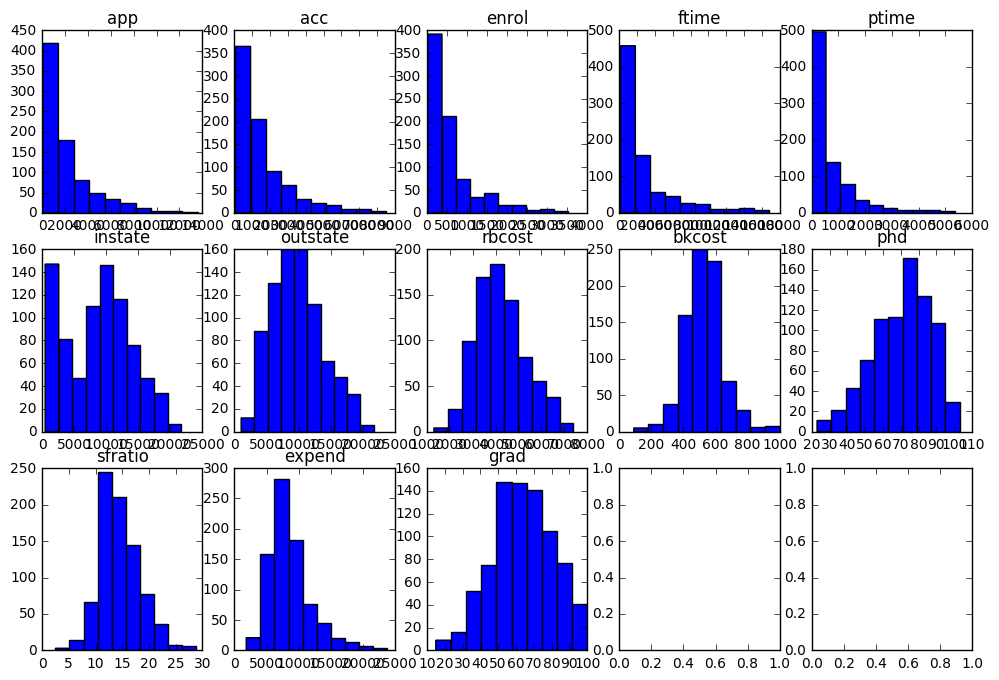

In [5]:
f, axarr = plt.subplots(3, 5,figsize=(12,8))

j = 0
for i in data.columns[:13]:
    k = int(j / 5)
    l = j % 5
    axarr[k, l].hist(data[i])
    axarr[k, l].set_title(i)
    j += 1

plt.show()

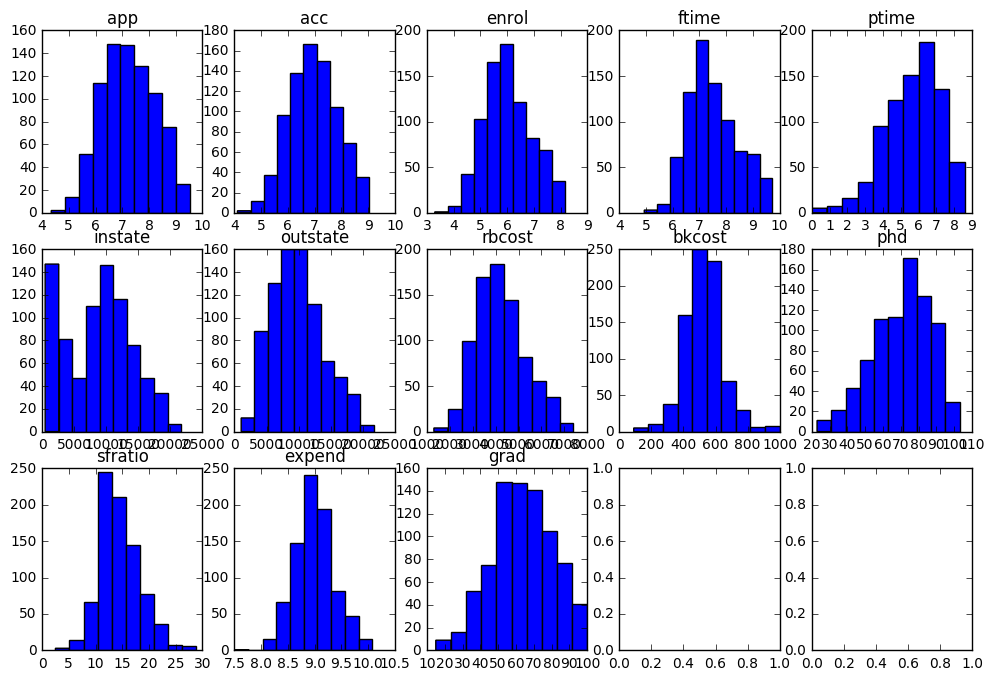

In [6]:
sdata = data
for i in list(sdata.columns[:5])+['expend']:
    sdata[i] = np.log(sdata[i])

f, axarr = plt.subplots(3, 5,figsize=(12,8))

j = 0
for i in sdata.columns[:13]:
    k = int(j / 5)
    l = j % 5
    axarr[k, l].hist(sdata[i])
    axarr[k, l].set_title(i)
    j += 1

plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(sdata.ix[:,:'grad'], sdata.good
                                                    , test_size=0.3, random_state=852)

In [8]:
logreg = linear_model.LogisticRegression(C=1e2)
logreg.fit(X_train, y_train)
print(classification_report(y_train, logreg.predict(X_train)))
print('training error:', 1-sum(y_train == logreg.predict(X_train))/len(y_train))
print(classification_report(y_test, logreg.predict(X_test)))
print('testing error:', 1-sum(y_test == logreg.predict(X_test))/len(y_test))

             precision    recall  f1-score   support

          0       0.87      0.94      0.90       422
          1       0.77      0.59      0.67       145

avg / total       0.84      0.85      0.84       567

training error: 0.149911816578
             precision    recall  f1-score   support

          0       0.85      0.96      0.90       178
          1       0.82      0.55      0.65        66

avg / total       0.84      0.84      0.83       244

testing error: 0.155737704918


Compare with the overall model, the model is improved slightly; but the model from R isn't.